# Modular Neural Network for CIFAR 10


In the below lines of code, an attempt to implement MNN for CIFAR 10 dataset has been made. 

* Contents of dataset :  
> 60000 32x32 colour images in 10 classes, with 6000 images per class
> There are 50000 training images and 10000 test images

* The model that has been implemented based on the [research paper](https://drive.google.com/file/d/1eLd8RO6nVFDBdYpXCGVngzabiVaIphKM/view?usp=sharing) :

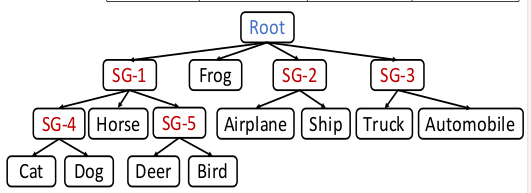



# 1. Loading the dataset and obtaining training and test sets

In [2]:
# Importing libraries initially required
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow.keras.datasets import cifar10

# loading cifar 10 dataset for training and testing.
#x--> Images, y--> labels
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [2]:
print(x_train.shape)

(50000, 32, 32, 3)


In [3]:
# setting class names
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#----------0:g2,-----1:g3,-----2:g1,5---3:g1,4-----4:g1,5-----5:g1,4----6:g0---7:g1-----8:g2------9:g3

#normalizing the data
x_train=x_train/255.0
x_train.shape
x_test=x_test/255.0
x_test.shape

#reshaping 2D shape of labels to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)


# 2. Defining MNN tree structure as modules of different sizes

##  Defining root module

In [4]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

#defining root module
def root_module():
    
    conv= models.Sequential([
    layers.Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same', input_shape = (32,32,3)),
    layers.Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2,2)),
              ])   
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
              ])  
    out.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    out.fit(x_train,y_train,8,epochs=30)

    return conv, out
    
              
# vgg : 1 block - 6 layers


##  Defining supergroup modules
* Root (level 0)- VGG block of size 1
* Supergroups at level 1 - VGG block of size 2
* Supergroups at level 2 - VGG block of size 3


In [5]:
def sg0_mod(root_conv):
    
    conv= models.Sequential([
    root_conv,
    layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
    layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2,2)),
              ])   
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
              ])  

    return  out


    

#vgg : 2 block - 9 layers

def sg1_mod(root_conv):
    
    conv= models.Sequential([
    root_conv,
    layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
    layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
    tf.keras.layers.MaxPooling2D((2,2)),
              ])   
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
              ])  

    return conv, out



def sg2_mod(root_conv):
    conv= models.Sequential([
        root_conv,
        layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
        layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
        tf.keras.layers.MaxPooling2D((2,2)),
              ])  
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
                  ])  
    return out


def sg3_mod(root_conv):
    conv= models.Sequential([
        root_conv,
        layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
        layers.Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'random_normal', padding = 'same'),
        tf.keras.layers.MaxPooling2D((2,2)),
              ])  
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
                  ])  
    return out
              
#9

def sg4_mod(sg_conv):
    conv= models.Sequential([
        sg_conv,
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),
              ])  
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
                  ])  
    return out

def sg5_mod(sg_conv):
    conv= models.Sequential([
        sg_conv,
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', padding='same'),
        tf.keras.layers.MaxPooling2D((2,2)),
              ])  
    out= models.Sequential([
        conv,
        layers.Flatten(),
        layers.Dense(128, activation = 'relu', kernel_initializer = 'random_normal'),
        layers.Dense(10, activation = 'softmax')
                  ])  
    return out

# 3. Training the Root node

In [6]:
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
root_conv,root=root_module()


2021-10-20 13:43:03.980082: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 13:43:03.995109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 13:43:03.995622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-20 13:43:03.996151: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/30


2021-10-20 13:43:06.911193: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8202


6250/6250 [==============================] - 16s 2ms/step - loss: 1.2601 - accuracy: 0.5529
Epoch 2/30
6250/6250 [==============================] - 12s 2ms/step - loss: 0.8903 - accuracy: 0.6869
Epoch 3/30
6250/6250 [==============================] - 16s 3ms/step - loss: 0.6975 - accuracy: 0.7536
Epoch 4/30
6250/6250 [==============================] - 13s 2ms/step - loss: 0.5219 - accuracy: 0.8170
Epoch 5/30
6250/6250 [==============================] - 14s 2ms/step - loss: 0.3770 - accuracy: 0.8673
Epoch 6/30
6250/6250 [==============================] - 13s 2ms/step - loss: 0.2691 - accuracy: 0.9053
Epoch 7/30
6250/6250 [==============================] - 13s 2ms/step - loss: 0.2055 - accuracy: 0.9281
Epoch 8/30
6250/6250 [==============================] - 16s 2ms/step - loss: 0.1621 - accuracy: 0.9436
Epoch 9/30
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1408 - accuracy: 0.9521
Epoch 10/30
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1274

In [7]:

root.save('root.h5')

In [8]:
import keras
root_mod = tf.keras.models.load_model('root.h5')

loss,va1= root_mod.evaluate(x_test,y_test,8)


2021-10-20 13:50:44.863393: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.
2021-10-20 13:50:45.005022: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 [==============================] - 2s 1ms/step - loss: 5.4917 - accuracy: 0.6385


In [9]:
import gc

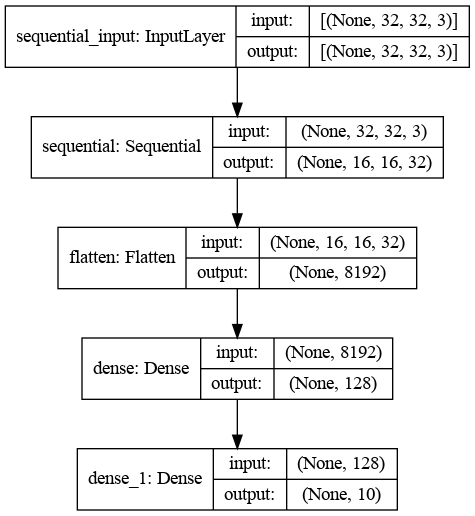

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(root, to_file='root.png', show_shapes=True, show_layer_names=True)

In [11]:
gc.collect()

2992

# 4. Defining constraints for training the supergroups

## Defining Accuracy density as a function
Change in accuracy density is given by the formula 
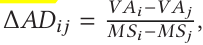

In [12]:
#from root
MS1=6

#initializing for reference
va2=0
MS2=0
threshold=0.1

def delta_AD(va1,va2,MS1,MS2):
  AD=((va2-va1)/(MS2-MS1))
  return AD

In [13]:
AD_temp=delta_AD(va1,va2,MS1,MS2)

In [16]:
print(AD_temp)
print(va1,va2,MS1,MS2)

print("Accuracy of root node ",va1*100)

0.10641666253407796
0.6384999752044678 0 6 0
Accuracy of root node  63.84999752044678


# 5. Training supergroups 

based on the condition that change in accuracy density is greater than threshold if it is lesser then the subgroup need not be trained

## Training Supergroup 0

In [17]:
'''
----------------0------------1---------2------3-----4-----5-------6------7------8-------9-----
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#----------0:g2,-----1:g3,-----2:g1,5---3:g1,4-----4:g1,5-----5:g1,4----6:g0---7:g1-----8:g2------9:g3
#frog--> 
#airplane,ship :              0,8 --- > g2
#automobile,truck:            1,9 ---> g3
#bird,cat,deer,dog,horse:  2,3,4,5,7
#cat,dog --> sg4 (3,5)
#bird,deer --> sg5 (2,4)
###################################################################################################################################################
'''

y=len(y_test)

AD0=AD_temp
AD1=AD_temp
AD2=AD_temp
AD3=AD_temp
AD4=AD_temp
AD5=AD_temp

va_g0=0
va_g1=0
va_g2=0
va_g3=0

batch_size=16
lr=0.0001
opt_02 = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

ep=10

sg1_conv=0
for i in range(y):
    if y_test[i] in [6] :
          if (AD0>threshold):
            print('super group 0 : AD = ',AD0)
            sg0=sg0_mod(root_conv)
            sg0.compile(optimizer=opt_02, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            sg0_details=sg0.fit(x_train, y_train, batch_size, epochs=10)
            loss,va2=sg0.evaluate(x_test,y_test)
            AD0=delta_AD(va1,va2,MS1,MS2)
            va_g0=va2
            print('super group 0 : AD = ',AD0)
            if(AD0<threshold):
                sg0.save('sg0.h5')
            MS2=9
gc.collect()


super group 0 : AD =  0.10641666253407796


2021-10-20 13:52:48.237372: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
3125/3125 [==============================] - 10s 3ms/step - loss: 1.0246 - accuracy: 0.6425
Epoch 2/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.7230 - accuracy: 0.7463
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.5847 - accuracy: 0.7948
Epoch 4/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.4775 - accuracy: 0.8322
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3927 - accuracy: 0.8622
Epoch 6/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3172 - accuracy: 0.8886
Epoch 7/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2638 - accuracy: 0.9070
Epoch 8/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.2275 - accuracy: 0.9204
Epoch 9/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.1986 - accuracy: 0.9308
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.30

1622

## Training Supergroup 2

In [18]:

for i in range(y):
    if y_test[i] in [0,8] :
          if (AD2>threshold):
            sg2=sg2_mod(root_conv)
            print('Super group 2: AD = ',AD2)
            sg2.compile(optimizer=opt_02, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            sg2_details=sg2.fit(x_train, y_train, batch_size, epochs=10)
            loss,va2=sg2.evaluate(x_test,y_test)
            AD2=delta_AD(va1,va2,MS1,MS2)
            va_g2=va2
            print('super group 2 : AD = ',AD2)
            if(AD2<threshold):
                sg2.save('sg2.h5')
            MS2=9
gc.collect()



Super group 2: AD =  0.10641666253407796
Epoch 1/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.3531 - accuracy: 0.5085
Epoch 2/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.9971 - accuracy: 0.6428
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8660 - accuracy: 0.6916
Epoch 4/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7678 - accuracy: 0.7276
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.6866 - accuracy: 0.7541
Epoch 6/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.6120 - accuracy: 0.7849
Epoch 7/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.5395 - accuracy: 0.8078
Epoch 8/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.4605 - accuracy: 0.8367
Epoch 9/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.4013 - accuracy: 0.8576
Epoch 10/10
313/313 [=================

1622

## Training Supergroup 3

In [22]:
AD3=AD_temp
for i in range(y):
    if y_test[i] in [1,9] :
        if (AD3>threshold):
            print('Super group 3 : AD = ',AD3)
            sg3=sg3_mod(root_conv)
            sg3.compile(optimizer=opt_02, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            sg3_details=sg3.fit(x_train, y_train, batch_size, epochs=10)
            loss,va2=sg3.evaluate(x_test,y_test)
            AD3=delta_AD(va1,va2,MS1,MS2)
            va_g3=va2
            print('super group 3 : AD = ',AD3)
            if(AD3<threshold):
                sg3.save('sg3.h5')
            MS2=9
gc.collect()



Super group 3 : AD =  0.10641666253407796
Epoch 1/10
3125/3125 [==============================] - 9s 3ms/step - loss: 1.2648 - accuracy: 0.5486
Epoch 2/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.8837 - accuracy: 0.6865
Epoch 3/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.7721 - accuracy: 0.7281
Epoch 4/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.6841 - accuracy: 0.7600
Epoch 5/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.6046 - accuracy: 0.7856
Epoch 6/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.5176 - accuracy: 0.8183
Epoch 7/10
3125/3125 [==============================] - 11s 3ms/step - loss: 0.4359 - accuracy: 0.8442
Epoch 8/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.3667 - accuracy: 0.8700
Epoch 9/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.3093 - accuracy: 0.8901
Epoch 10/10
313/313 [==============

2705

## Training Supergroup 1 and supergroup 4

In [27]:
AD1=AD_temp
AD4=AD_temp

for i in range(y):
    if y_test[i] in [2,3,4,5,7] : #g5--> horse
        if (AD1>threshold):
            print('Super group 1: AD = ',AD1)
            sg1_conv,sg1=sg1_mod(root_conv)
            sg1.compile(optimizer=opt_02, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            sg1_details=sg1.fit(x_train, y_train, batch_size, epochs=10)
            loss,va2=sg1.evaluate(x_test,y_test)
            AD1=delta_AD(va1,va2,MS1,MS2)
            print('super group 1 : AD = ',AD1)
            sg1.save('sg1.h5')
            MS2=9
            va_g1=va2
            if (AD4>threshold) and (y_test[i] in  [3,5]): 
                print('Super group 4:: AD = ',AD4)
                sg4=sg4_mod(sg1_conv)
                sg4.compile(optimizer=opt_02, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                sg4_details=sg4.fit(x_train, y_train, batch_size, epochs=)
                loss,va2=sg4.evaluate(x_test,y_test)
                AD4=delta_AD(va1,va2,MS1,MS2)
                MS2=9
                if(AD4<threshold):
                    sg4.save('sg4.h5')
                    gc.collect()
                va_g4=va2
                print('super group 4 : AD = ',AD4)

gc.collect()

Super group 1: AD =  0.10641666253407796
Epoch 1/10
3125/3125 [==============================] - 10s 3ms/step - loss: 1.0946 - accuracy: 0.6098
Epoch 2/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.8104 - accuracy: 0.7131
Epoch 3/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.7004 - accuracy: 0.7531
Epoch 4/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.6199 - accuracy: 0.7804
Epoch 5/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.5564 - accuracy: 0.8031
Epoch 6/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.4913 - accuracy: 0.8240
Epoch 7/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.4246 - accuracy: 0.8489
Epoch 8/10
3125/3125 [==============================] - 9s 3ms/step - loss: 0.3608 - accuracy: 0.8715
Epoch 9/10
3125/3125 [==============================] - 10s 3ms/step - loss: 0.3046 - accuracy: 0.8913
Epoch 10/10
313/313 [===============

0

## Training Supergroup 5

In [30]:

for i in range(y):
    if y_test[i] in [2,3,4,5,7] : #g5--> horse
            sg1_conv,sg1=sg1_mod(root_conv)
            if (AD5>threshold) and (y_test[i] in  [2,4]): 
                print('Super group 5:: AD = ',AD5)
                sg5=sg5_mod(sg1_conv)
                sg5.compile(optimizer=opt_02, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                sg5_details=sg5.fit(x_train, y_train, batch_size, epochs=10)
                loss,va2=sg5.evaluate(x_test,y_test)
                AD5=delta_AD(va1,va2,MS1,MS2)
                MS2=12
                va_g5=va2
                print('super group 5 : AD = ',AD5)
                if(AD5<threshold):
                    sg5.save('sg5.h5')
                    gc.collect()
                    break
        
        

Super group 5:: AD =  0.10641666253407796
Epoch 1/10
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1033 - accuracy: 0.6020
Epoch 2/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.7909 - accuracy: 0.7186
Epoch 3/10
3125/3125 [==============================] - 12s 4ms/step - loss: 0.6998 - accuracy: 0.7536
Epoch 4/10
3125/3125 [==============================] - 14s 4ms/step - loss: 0.6348 - accuracy: 0.7762
Epoch 5/10
3125/3125 [==============================] - 13s 4ms/step - loss: 0.5784 - accuracy: 0.7964
Epoch 6/10
3125/3125 [==============================] - 14s 4ms/step - loss: 0.5340 - accuracy: 0.8102
Epoch 7/10
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4895 - accuracy: 0.8268
Epoch 8/10
3125/3125 [==============================] - 14s 5ms/step - loss: 0.4620 - accuracy: 0.8370
Epoch 9/10
3125/3125 [==============================] - 14s 4ms/step - loss: 0.4357 - accuracy: 0.8484
Epoch 10/10
313/313 [==========

In [31]:
gc.collect()

0

# 7. Checking to ensure improvement in accuracy

In [33]:
va_list=[va_g0,va_g1,va_g2,va_g3,va_g4,va_g5]

In [34]:
print("Accuracy of root node :",va1*100)
for i in range(6):
    if va_list[i]>va1:
        print("Supergroup ",i," has improved. From ",va1*100,"% to ",va_list[i]*100,"%")

Accuracy of root node : 63.84999752044678
Supergroup  0  has improved. From  63.84999752044678 % to  72.93000221252441 %
Supergroup  1  has improved. From  63.84999752044678 % to  72.29999899864197 %
Supergroup  2  has improved. From  63.84999752044678 % to  71.23000025749207 %
Supergroup  3  has improved. From  63.84999752044678 % to  71.61999940872192 %
Supergroup  4  has improved. From  63.84999752044678 % to  74.08000230789185 %
Supergroup  5  has improved. From  63.84999752044678 % to  73.32000136375427 %


# Conclusion :

The trained architecture shows improvement in accuracy and occupies lesser memory